In [369]:
# Import the essential libraries 

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectPercentile, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_curve, classification_report, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

In [370]:
# Import the data

df = pd.read_csv('mushrooms.csv')

In [371]:
df.head()

# All categories are alphabetical, need to make them numerical.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [372]:
df.info()

# No null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [373]:
# Check for any out of place values 

for col in df.columns:
    print(col, df[col].unique())
    
# Stalk root has some values populated as ?.

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [374]:
# Check the stalk root column

df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [375]:
# Drop the stalk root column

df.drop('stalk-root', axis=1, inplace=True)

In [376]:
# Rename the columns 

df.rename(columns={'cap-shape':'cap_shape', 'cap-surface':'cap_surface', 'cap-color':'cap_color', 
                   'gill-attachment':'gill_attachment', 'gill-spacing':'gill_spacing', 'gill-size':'gill_size', 
                   'gill-color':'gill_color', 'stalk-shape':'stalk_shape', 'stalk-surface-above-ring':'stalk_surface_above_ring', 
                   'stalk-surface-below-ring':'stalk_surface_below_ring', 
                   'stalk-color-above-ring':'stalk_color_above_ring', 'stalk-color-below-ring':'stalk_color_below_ring', 
                   'veil-type':'veil_type', 'veil-color':'veil_color', 'ring-number':'ring_number', 
                   'ring-type':'ring_type', 'spore-print-color':'spore_print_color'}, inplace=True)

In [377]:
# Create a train, test and validation set

df_train_val, df_test = train_test_split(df, test_size=1000, random_state=42, shuffle=True)
df_train, df_validation = train_test_split(df_train_val, test_size=1000, random_state=42, shuffle=True)

In [378]:
# Create a separate train set for EDA

df_train_eda = df_train.copy()

In [379]:
def create_list_of_encoded_values(df):
    le = LabelEncoder()
    d_list = []
    
    for col in df.columns:
        le.fit(df[col])
        d_list.append(dict(zip(le.classes_, le.transform(le.classes_))))
    return d_list

def encode_datasets(d_list, df):
    i=0
    for col in df.columns:
        df[col].replace(d_list[i], inplace=True)
        i+=1
    return (df)

In [380]:
# Create list of encoded values from training data

list_encoded_values = create_list_of_encoded_values(df_train)

# Encode training, test and validation data
df_train = encode_datasets(list_encoded_values, df_train)
df_test = encode_datasets(list_encoded_values, df_test)
df_validation = encode_datasets(list_encoded_values, df_validation)

C:\Users\AniketBandhekar\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [384]:
# Feature importance using correlation matrix

df_train.corr()['class'].sort_values()

# The features with significant correlation (above 0.3) are gill size, gill color, bruises and ring type 

gill_color                 -0.530992
bruises                    -0.504204
ring_type                  -0.412601
stalk_surface_above_ring   -0.345157
gill_spacing               -0.344427
stalk_surface_below_ring   -0.303675
ring_number                -0.216872
stalk_color_above_ring     -0.148464
stalk_color_below_ring     -0.140050
odor                       -0.099336
stalk_shape                -0.092680
cap_color                  -0.036926
cap_shape                   0.051165
gill_attachment             0.124822
veil_color                  0.146588
spore_print_color           0.177776
cap_surface                 0.180424
habitat                     0.213982
population                  0.297772
gill_size                   0.548132
class                       1.000000
veil_type                        NaN
Name: class, dtype: float64

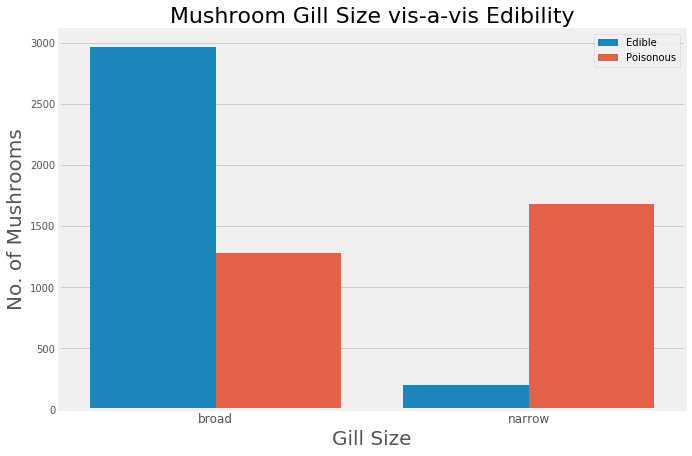

In [394]:
# Gill size

fig, ax = plt.subplots(figsize=(10,7))

sns.countplot(x='gill_size', data=df_train_eda, hue='class')

ax.set_xlabel("Gill Size",fontsize=20)
ax.set_ylabel('No. of Mushrooms',fontsize=20)
ax.set_title('Mushroom Gill Size vis-a-vis Edibility',fontsize=22)
ax.set_xticklabels(('broad', 'narrow'),
                  fontsize = 12)

L = plt.legend()
L.get_texts()[0].set_text('Edible')
L.get_texts()[1].set_text('Poisonous')

# More number of poisonous mushrooms have a narrow gill size as against wide. Also, there are more poisonous mushrooms 
# vis-a-vis edible mushrooms in narrow gill size. 

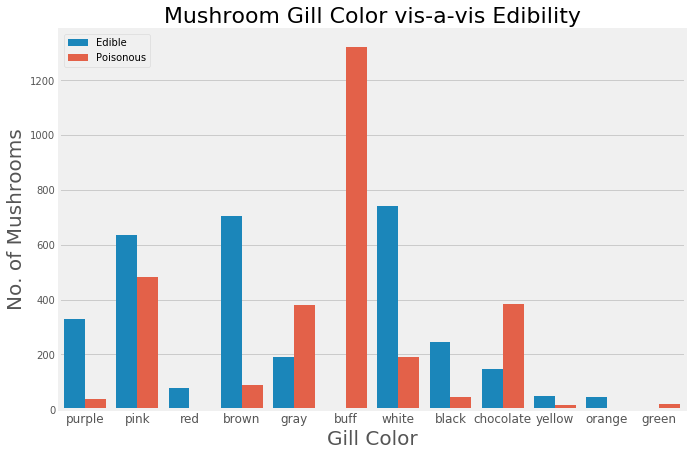

In [409]:
# Gill color

fig, ax = plt.subplots(figsize=(10,7))

sns.countplot(x='gill_color', data=df_train_eda, hue='class')

ax.set_xlabel("Gill Color",fontsize=20)
ax.set_ylabel('No. of Mushrooms',fontsize=20)
ax.set_title('Mushroom Gill Color vis-a-vis Edibility',fontsize=22)
ax.set_xticklabels(('purple', 'pink', 'red', 'brown', 'gray', 'buff', 'white', 'black', 'chocolate', 'yellow', 'orange', 'green'), fontsize = 12)

#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

L = plt.legend()
L.get_texts()[0].set_text('Edible')
L.get_texts()[1].set_text('Poisonous')

# Most poisonous mushrooms are of buff color. Infact, all buff mushrooms are poisonous. Most non poisonous mushrooms are of
# purple, pink, brown or white color. if you encounter purple, brown or white, black mushrooms, there is a high chance of 
# them being non poisonous. While if you encounter gray, chocolate or buff ones, they will be poisonous. 

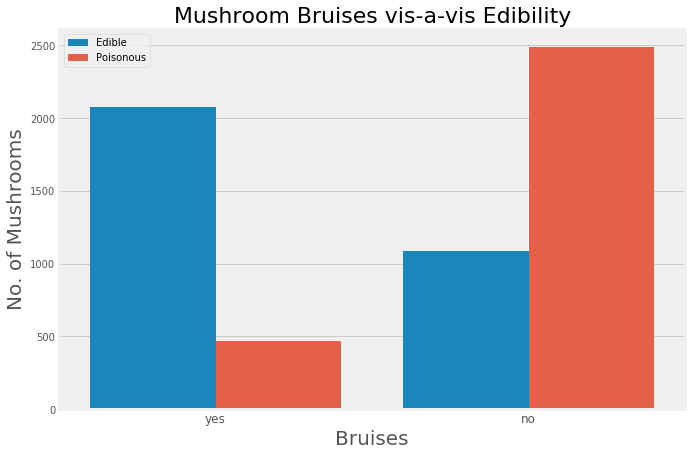

In [411]:
# Bruises

fig, ax = plt.subplots(figsize=(10,7))

sns.countplot(x='bruises', data=df_train_eda, hue='class')

ax.set_xlabel("Bruises",fontsize=20)
ax.set_ylabel('No. of Mushrooms',fontsize=20)
ax.set_title('Mushroom Bruises vis-a-vis Edibility',fontsize=22)
ax.set_xticklabels(('yes', 'no'), fontsize = 12)

#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

L = plt.legend()
L.get_texts()[0].set_text('Edible')
L.get_texts()[1].set_text('Poisonous')

# If mushrooms has bruises, there is a high chance it is edible. While if it doesnt, there is a high chance it is poisonous.

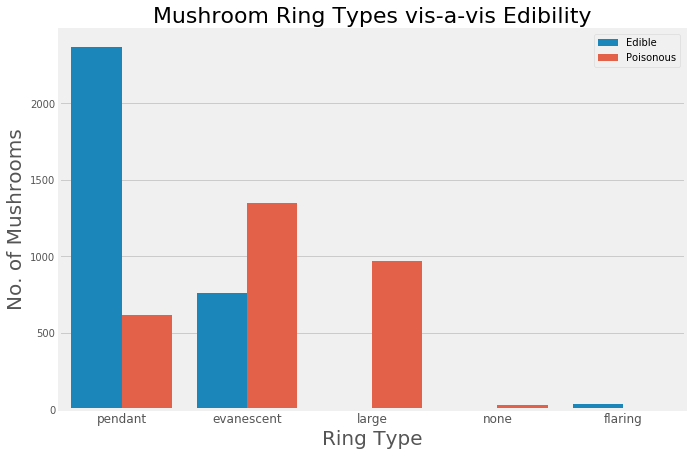

In [416]:
# Ring type

fig, ax = plt.subplots(figsize=(10,7))

sns.countplot(x='ring_type', data=df_train_eda, hue='class')

ax.set_xlabel("Ring Type",fontsize=20)
ax.set_ylabel('No. of Mushrooms',fontsize=20)
ax.set_title('Mushroom Ring Types vis-a-vis Edibility',fontsize=22)
ax.set_xticklabels(('pendant', 'evanescent', 'large', 'none', 'flaring'), fontsize = 12)

L = plt.legend()
L.get_texts()[0].set_text('Edible')
L.get_texts()[1].set_text('Poisonous')

# Pendant has largest number of edible and evanescent has largest number of poisonous ones. 
# if you encounter a pendant mushroom, it will most probably be edible
# whereas if you encounter a large or evanescent mushroom, it will most probably be poisonous

In [184]:
# # Feature importance using extra trees classifier 

# plt.figure(figsize=(15,6))

# et_clf = ExtraTreesClassifier(random_state=42)
# et_clf.fit(df_train.drop('class', axis=1), df_train['class'])

# a = pd.DataFrame(sorted(list(zip((et_clf.feature_importances_), (df_train.drop('class', axis=1).columns)))), 
#                 columns=['Feature', 'Name'])

# fig = go.Figure(go.Bar(x=a['Feature'], y=a['Name'], orientation='h'))

# fig.show()

# # The largest 12 keep swapping their positions if random state is not set. Lets consider all of them as features for our models. 

Text(0.5, 1.0, 'Features and their Importance')

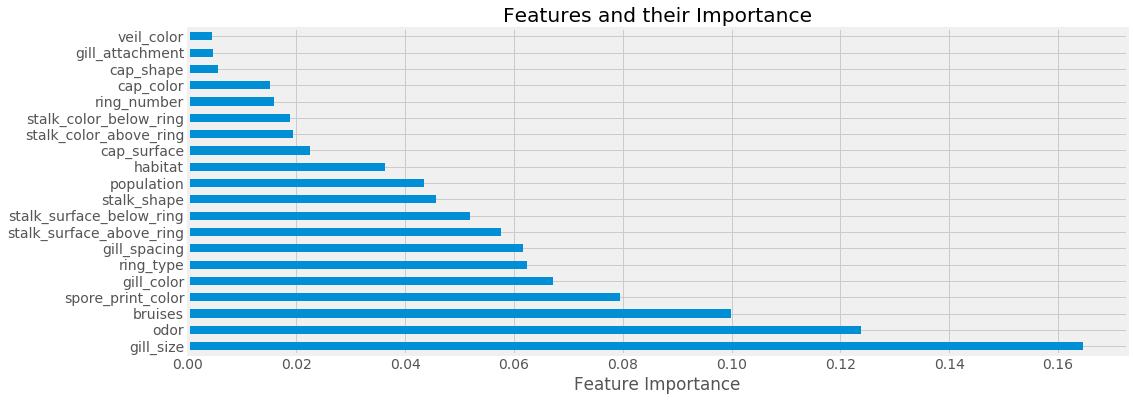

In [417]:
# # Feature importance using extra trees classifier 

plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')

et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(df_train.drop('class', axis=1), df_train['class'])

pd.Series(et_clf.feature_importances_, index=df_train.drop('class', axis=1).columns).nlargest(20).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Features and their Importance')

# # The largest 12 keep swapping their positions if random state is not set. Lets consider all of them as features for our models. 

In [73]:
# Create a new set out of the important features

def new_set(x, old_set):
    
    nue_set = pd.DataFrame()
    
    for col in pd.Series(et_clf.feature_importances_, index=df_train.drop('class', axis=1).columns).nlargest(x).index:
        nue_set[col] = old_set[col]
    nue_set['class'] = old_set['class']
    return (nue_set)

In [74]:
# X train and y train 

df_train_new = new_set(12, df_train)

X_train = df_train_new.drop('class', axis=1)
y_train = df_train_new['class']

In [75]:
# Scaling the X train values 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [76]:
# X validation and y validation 

df_validation_new = new_set(12, df_validation)

X_val = df_validation_new.drop('class', axis=1)
y_val = df_validation_new['class']

In [78]:
# Scaling the X validation values

X_val = scaler.transform(X_val)

In [134]:
# Lets check the bare bones classifiers first

sgd_clf = SGDClassifier(random_state=42) 
log_clf = LogisticRegression(random_state=42)
knn_clf = KNeighborsClassifier()
svc_clf = SVC(random_state=42) # kernel is rbf here, linear kernel is already covered in linearSVC, poly can be tried  
lsvc_clf = LinearSVC(random_state=42)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

models = [sgd_clf, log_clf, knn_clf, svc_clf, lsvc_clf, dt_clf, rf_clf]
accuracy_scores = []
recall_scores = []

for clf in [sgd_clf, log_clf, knn_clf, svc_clf, lsvc_clf, dt_clf, rf_clf]:
    
    # Fit the classifier on training data
    clf.fit(X_train, y_train)
    
    # Make predictions for validation data
    y_pred = clf.predict(X_val)
    
    # Performance measures for validation data
    print('confusion matrix for {}:'.format(clf.__class__.__name__), '\n', confusion_matrix(y_val, y_pred))
    print('precision score for {}:'.format(clf.__class__.__name__), precision_score(y_val, y_pred))
    print('recall score for {}:'.format(clf.__class__.__name__), recall_score(y_val, y_pred))
    print('accuracy score for {}:'.format(clf.__class__.__name__), accuracy_score(y_val, y_pred))
    print('-'*100)
    
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    recall_scores.append(recall_score(y_val, y_pred))

confusion matrix for SGDClassifier: 
 [[487  30]
 [ 31 452]]
precision score for SGDClassifier: 0.9377593360995851
recall score for SGDClassifier: 0.9358178053830227
accuracy score for SGDClassifier: 0.939
----------------------------------------------------------------------------------------------------
confusion matrix for LogisticRegression: 
 [[495  22]
 [ 31 452]]
precision score for LogisticRegression: 0.9535864978902954
recall score for LogisticRegression: 0.9358178053830227
accuracy score for LogisticRegression: 0.947
----------------------------------------------------------------------------------------------------
confusion matrix for KNeighborsClassifier: 
 [[517   0]
 [  0 483]]
precision score for KNeighborsClassifier: 1.0
recall score for KNeighborsClassifier: 1.0
accuracy score for KNeighborsClassifier: 1.0
----------------------------------------------------------------------------------------------------
confusion matrix for SVC: 
 [[517   0]
 [  0 483]]
precision sc

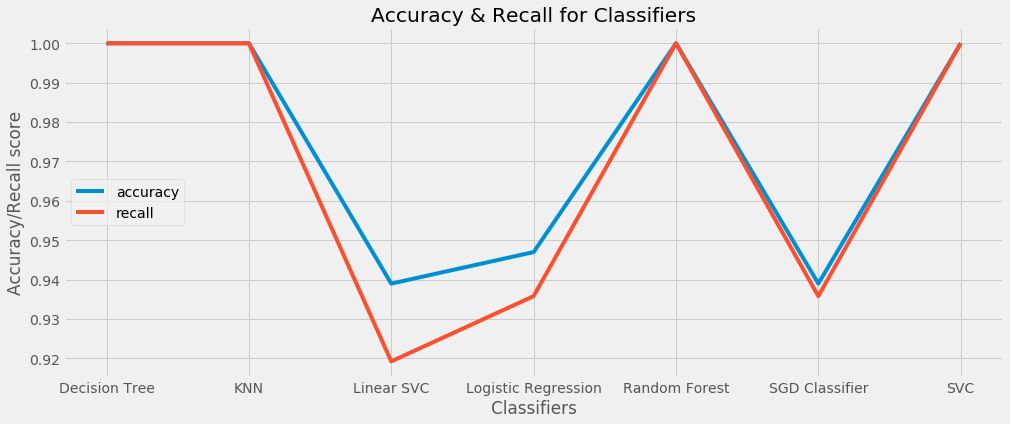

In [204]:
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight')

# fig, ax = plt.subplots(figsize=(15,6))

mylist = ['SGD Classifier', 'Logistic Regression', 'KNN', 'SVC', 'Linear SVC', 'Decision Tree', 'Random Forest']

sns.lineplot(x=mylist, y=accuracy_scores, label='accuracy')
sns.lineplot(x=mylist, y=recall_scores, label='recall')

plt.title('Accuracy & Recall for Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy/Recall score')

# ax.set_xticks(['SGD Classifier', 'Logistic Regression', 'KNN', 'SVC', 'Linear SVC', 'Decision Tree', 'Random Forest'])

plt.legend(loc='center left')

In [103]:
# Hyperparameter tuning for SGDClassifier

parameters = [{'penalty':['l1', 'l2'], 'alpha':np.arange(0.00005, 0.001, 0.00005), 'max_iter':range(1000, 2000, 100)}]

sgd_clf = SGDClassifier(random_state=42)

grid_search_sgd = GridSearchCV(sgd_clf, parameters, cv=3, scoring='accuracy', verbose=2) # cv is 5 by default, n_iter is 10 by default

grid_search_sgd.fit(X_train, y_train)

Fitting 3 folds for each of 380 candidates, totalling 1140 fits
[CV] alpha=5e-05, max_iter=1000, penalty=l1 ..........................
[CV] ........... alpha=5e-05, max_iter=1000, penalty=l1, total=   0.1s
[CV] alpha=5e-05, max_iter=1000, penalty=l1 ..........................
[CV] ........... alpha=5e-05, max_iter=1000, penalty=l1, total=   0.0s
[CV] alpha=5e-05, max_iter=1000, penalty=l1 ..........................
[CV] ........... alpha=5e-05, max_iter=1000, penalty=l1, total=   0.0s
[CV] alpha=5e-05, max_iter=1000, penalty=l2 ..........................
[CV] ........... alpha=5e-05, max_iter=1000, penalty=l2, total=   0.0s
[CV] alpha=5e-05, max_iter=1000, penalty=l2 ..........................
[CV] ........... alpha=5e-05, max_iter=1000, penalty=l2, total=   0.0s
[CV] alpha=5e-05, max_iter=1000, penalty=l2 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........... alpha=5e-05, max_iter=1000, penalty=l2, total=   0.0s
[CV] alpha=5e-05, max_iter=1100, penalty=l1 ..........................
[CV] ........... alpha=5e-05, max_iter=1100, penalty=l1, total=   0.1s
[CV] alpha=5e-05, max_iter=1100, penalty=l1 ..........................
[CV] ........... alpha=5e-05, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=5e-05, max_iter=1100, penalty=l1 ..........................
[CV] ........... alpha=5e-05, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=5e-05, max_iter=1100, penalty=l2 ..........................
[CV] ........... alpha=5e-05, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=5e-05, max_iter=1100, penalty=l2 ..........................
[CV] ........... alpha=5e-05, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=5e-05, max_iter=1100, penalty=l2 ..........................
[CV] ........... alpha=5e-05, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=5e-05, max_iter=1200, penalty=l1 ..........................
[CV] .

[CV] .......... alpha=0.0001, max_iter=1000, penalty=l2, total=   0.0s
[CV] alpha=0.0001, max_iter=1000, penalty=l2 .........................
[CV] .......... alpha=0.0001, max_iter=1000, penalty=l2, total=   0.0s
[CV] alpha=0.0001, max_iter=1100, penalty=l1 .........................
[CV] .......... alpha=0.0001, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=0.0001, max_iter=1100, penalty=l1 .........................
[CV] .......... alpha=0.0001, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=0.0001, max_iter=1100, penalty=l1 .........................
[CV] .......... alpha=0.0001, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=0.0001, max_iter=1100, penalty=l2 .........................
[CV] .......... alpha=0.0001, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.0001, max_iter=1100, penalty=l2 .........................
[CV] .......... alpha=0.0001, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.0001, max_iter=1100, penalty=l2 .........................
[CV] .

[CV]  alpha=0.00015000000000000001, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=0.00015000000000000001, max_iter=1100, penalty=l1 .........
[CV]  alpha=0.00015000000000000001, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=0.00015000000000000001, max_iter=1100, penalty=l2 .........
[CV]  alpha=0.00015000000000000001, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.00015000000000000001, max_iter=1100, penalty=l2 .........
[CV]  alpha=0.00015000000000000001, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.00015000000000000001, max_iter=1100, penalty=l2 .........
[CV]  alpha=0.00015000000000000001, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.00015000000000000001, max_iter=1200, penalty=l1 .........
[CV]  alpha=0.00015000000000000001, max_iter=1200, penalty=l1, total=   0.0s
[CV] alpha=0.00015000000000000001, max_iter=1200, penalty=l1 .........
[CV]  alpha=0.00015000000000000001, max_iter=1200, penalty=l1, total=   0.0s
[CV] alpha=0.00015000000000000001, 

[CV] .......... alpha=0.0002, max_iter=1100, penalty=l1, total=   0.0s
[CV] alpha=0.0002, max_iter=1100, penalty=l2 .........................
[CV] .......... alpha=0.0002, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.0002, max_iter=1100, penalty=l2 .........................
[CV] .......... alpha=0.0002, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.0002, max_iter=1100, penalty=l2 .........................
[CV] .......... alpha=0.0002, max_iter=1100, penalty=l2, total=   0.0s
[CV] alpha=0.0002, max_iter=1200, penalty=l1 .........................
[CV] .......... alpha=0.0002, max_iter=1200, penalty=l1, total=   0.0s
[CV] alpha=0.0002, max_iter=1200, penalty=l1 .........................
[CV] .......... alpha=0.0002, max_iter=1200, penalty=l1, total=   0.0s
[CV] alpha=0.0002, max_iter=1200, penalty=l1 .........................
[CV] .......... alpha=0.0002, max_iter=1200, penalty=l1, total=   0.0s
[CV] alpha=0.0002, max_iter=1200, penalty=l2 .........................
[CV] .

[CV] ......... alpha=0.00025, max_iter=1200, penalty=l1, total=   0.0s
[CV] alpha=0.00025, max_iter=1200, penalty=l2 ........................
[CV] ......... alpha=0.00025, max_iter=1200, penalty=l2, total=   0.0s
[CV] alpha=0.00025, max_iter=1200, penalty=l2 ........................
[CV] ......... alpha=0.00025, max_iter=1200, penalty=l2, total=   0.0s
[CV] alpha=0.00025, max_iter=1200, penalty=l2 ........................
[CV] ......... alpha=0.00025, max_iter=1200, penalty=l2, total=   0.0s
[CV] alpha=0.00025, max_iter=1300, penalty=l1 ........................
[CV] ......... alpha=0.00025, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00025, max_iter=1300, penalty=l1 ........................
[CV] ......... alpha=0.00025, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00025, max_iter=1300, penalty=l1 ........................
[CV] ......... alpha=0.00025, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00025, max_iter=1300, penalty=l2 ........................
[CV] .

[CV]  alpha=0.00030000000000000003, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00030000000000000003, max_iter=1300, penalty=l1 .........
[CV]  alpha=0.00030000000000000003, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00030000000000000003, max_iter=1300, penalty=l2 .........
[CV]  alpha=0.00030000000000000003, max_iter=1300, penalty=l2, total=   0.0s
[CV] alpha=0.00030000000000000003, max_iter=1300, penalty=l2 .........
[CV]  alpha=0.00030000000000000003, max_iter=1300, penalty=l2, total=   0.0s
[CV] alpha=0.00030000000000000003, max_iter=1300, penalty=l2 .........
[CV]  alpha=0.00030000000000000003, max_iter=1300, penalty=l2, total=   0.0s
[CV] alpha=0.00030000000000000003, max_iter=1400, penalty=l1 .........
[CV]  alpha=0.00030000000000000003, max_iter=1400, penalty=l1, total=   0.0s
[CV] alpha=0.00030000000000000003, max_iter=1400, penalty=l1 .........
[CV]  alpha=0.00030000000000000003, max_iter=1400, penalty=l1, total=   0.0s
[CV] alpha=0.00030000000000000003, 

[CV]  alpha=0.00035000000000000005, max_iter=1200, penalty=l2, total=   0.0s
[CV] alpha=0.00035000000000000005, max_iter=1200, penalty=l2 .........
[CV]  alpha=0.00035000000000000005, max_iter=1200, penalty=l2, total=   0.0s
[CV] alpha=0.00035000000000000005, max_iter=1200, penalty=l2 .........
[CV]  alpha=0.00035000000000000005, max_iter=1200, penalty=l2, total=   0.0s
[CV] alpha=0.00035000000000000005, max_iter=1300, penalty=l1 .........
[CV]  alpha=0.00035000000000000005, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00035000000000000005, max_iter=1300, penalty=l1 .........
[CV]  alpha=0.00035000000000000005, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00035000000000000005, max_iter=1300, penalty=l1 .........
[CV]  alpha=0.00035000000000000005, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.00035000000000000005, max_iter=1300, penalty=l2 .........
[CV]  alpha=0.00035000000000000005, max_iter=1300, penalty=l2, total=   0.0s
[CV] alpha=0.00035000000000000005, 

[CV] .......... alpha=0.0004, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.0004, max_iter=1300, penalty=l1 .........................
[CV] .......... alpha=0.0004, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.0004, max_iter=1300, penalty=l1 .........................
[CV] .......... alpha=0.0004, max_iter=1300, penalty=l1, total=   0.0s
[CV] alpha=0.0004, max_iter=1300, penalty=l2 .........................
[CV] .......... alpha=0.0004, max_iter=1300, penalty=l2, total=   0.0s
[CV] alpha=0.0004, max_iter=1300, penalty=l2 .........................
[CV] .......... alpha=0.0004, max_iter=1300, penalty=l2, total=   0.0s
[CV] alpha=0.0004, max_iter=1300, penalty=l2 .........................
[CV] .......... alpha=0.0004, max_iter=1300, penalty=l2, total=   0.0s
[CV] alpha=0.0004, max_iter=1400, penalty=l1 .........................
[CV] .......... alpha=0.0004, max_iter=1400, penalty=l1, total=   0.0s
[CV] alpha=0.0004, max_iter=1400, penalty=l1 .........................
[CV] .

[CV]  alpha=0.00045000000000000004, max_iter=1400, penalty=l1, total=   0.0s
[CV] alpha=0.00045000000000000004, max_iter=1400, penalty=l2 .........
[CV]  alpha=0.00045000000000000004, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.00045000000000000004, max_iter=1400, penalty=l2 .........
[CV]  alpha=0.00045000000000000004, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.00045000000000000004, max_iter=1400, penalty=l2 .........
[CV]  alpha=0.00045000000000000004, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.00045000000000000004, max_iter=1500, penalty=l1 .........
[CV]  alpha=0.00045000000000000004, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.00045000000000000004, max_iter=1500, penalty=l1 .........
[CV]  alpha=0.00045000000000000004, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.00045000000000000004, max_iter=1500, penalty=l1 .........
[CV]  alpha=0.00045000000000000004, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.00045000000000000004, 

[CV] .......... alpha=0.0005, max_iter=1400, penalty=l1, total=   0.0s
[CV] alpha=0.0005, max_iter=1400, penalty=l1 .........................
[CV] .......... alpha=0.0005, max_iter=1400, penalty=l1, total=   0.0s
[CV] alpha=0.0005, max_iter=1400, penalty=l2 .........................
[CV] .......... alpha=0.0005, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.0005, max_iter=1400, penalty=l2 .........................
[CV] .......... alpha=0.0005, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.0005, max_iter=1400, penalty=l2 .........................
[CV] .......... alpha=0.0005, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.0005, max_iter=1500, penalty=l1 .........................
[CV] .......... alpha=0.0005, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0005, max_iter=1500, penalty=l1 .........................
[CV] .......... alpha=0.0005, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0005, max_iter=1500, penalty=l1 .........................
[CV] .

[CV] ......... alpha=0.00055, max_iter=1400, penalty=l1, total=   0.0s
[CV] alpha=0.00055, max_iter=1400, penalty=l2 ........................
[CV] ......... alpha=0.00055, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.00055, max_iter=1400, penalty=l2 ........................
[CV] ......... alpha=0.00055, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.00055, max_iter=1400, penalty=l2 ........................
[CV] ......... alpha=0.00055, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.00055, max_iter=1500, penalty=l1 ........................
[CV] ......... alpha=0.00055, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.00055, max_iter=1500, penalty=l1 ........................
[CV] ......... alpha=0.00055, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.00055, max_iter=1500, penalty=l1 ........................
[CV] ......... alpha=0.00055, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.00055, max_iter=1500, penalty=l2 ........................
[CV] .

[CV]  alpha=0.0006000000000000001, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.0006000000000000001, max_iter=1400, penalty=l2 ..........
[CV]  alpha=0.0006000000000000001, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.0006000000000000001, max_iter=1500, penalty=l1 ..........
[CV]  alpha=0.0006000000000000001, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0006000000000000001, max_iter=1500, penalty=l1 ..........
[CV]  alpha=0.0006000000000000001, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0006000000000000001, max_iter=1500, penalty=l1 ..........
[CV]  alpha=0.0006000000000000001, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0006000000000000001, max_iter=1500, penalty=l2 ..........
[CV]  alpha=0.0006000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0006000000000000001, max_iter=1500, penalty=l2 ..........
[CV]  alpha=0.0006000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0006000000000000001, max_iter

[CV]  alpha=0.0006500000000000001, max_iter=1400, penalty=l2, total=   0.0s
[CV] alpha=0.0006500000000000001, max_iter=1500, penalty=l1 ..........
[CV]  alpha=0.0006500000000000001, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0006500000000000001, max_iter=1500, penalty=l1 ..........
[CV]  alpha=0.0006500000000000001, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0006500000000000001, max_iter=1500, penalty=l1 ..........
[CV]  alpha=0.0006500000000000001, max_iter=1500, penalty=l1, total=   0.0s
[CV] alpha=0.0006500000000000001, max_iter=1500, penalty=l2 ..........
[CV]  alpha=0.0006500000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0006500000000000001, max_iter=1500, penalty=l2 ..........
[CV]  alpha=0.0006500000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0006500000000000001, max_iter=1500, penalty=l2 ..........
[CV]  alpha=0.0006500000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0006500000000000001, max_iter

[CV]  alpha=0.0007000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0007000000000000001, max_iter=1500, penalty=l2 ..........
[CV]  alpha=0.0007000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0007000000000000001, max_iter=1500, penalty=l2 ..........
[CV]  alpha=0.0007000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] alpha=0.0007000000000000001, max_iter=1600, penalty=l1 ..........
[CV]  alpha=0.0007000000000000001, max_iter=1600, penalty=l1, total=   0.0s
[CV] alpha=0.0007000000000000001, max_iter=1600, penalty=l1 ..........
[CV]  alpha=0.0007000000000000001, max_iter=1600, penalty=l1, total=   0.0s
[CV] alpha=0.0007000000000000001, max_iter=1600, penalty=l1 ..........
[CV]  alpha=0.0007000000000000001, max_iter=1600, penalty=l1, total=   0.0s
[CV] alpha=0.0007000000000000001, max_iter=1600, penalty=l2 ..........
[CV]  alpha=0.0007000000000000001, max_iter=1600, penalty=l2, total=   0.0s
[CV] alpha=0.0007000000000000001, max_iter

[CV] ......... alpha=0.00075, max_iter=1600, penalty=l2, total=   0.0s
[CV] alpha=0.00075, max_iter=1600, penalty=l2 ........................
[CV] ......... alpha=0.00075, max_iter=1600, penalty=l2, total=   0.0s
[CV] alpha=0.00075, max_iter=1600, penalty=l2 ........................
[CV] ......... alpha=0.00075, max_iter=1600, penalty=l2, total=   0.0s
[CV] alpha=0.00075, max_iter=1700, penalty=l1 ........................
[CV] ......... alpha=0.00075, max_iter=1700, penalty=l1, total=   0.0s
[CV] alpha=0.00075, max_iter=1700, penalty=l1 ........................
[CV] ......... alpha=0.00075, max_iter=1700, penalty=l1, total=   0.0s
[CV] alpha=0.00075, max_iter=1700, penalty=l1 ........................
[CV] ......... alpha=0.00075, max_iter=1700, penalty=l1, total=   0.0s
[CV] alpha=0.00075, max_iter=1700, penalty=l2 ........................
[CV] ......... alpha=0.00075, max_iter=1700, penalty=l2, total=   0.0s
[CV] alpha=0.00075, max_iter=1700, penalty=l2 ........................
[CV] .

[CV] .......... alpha=0.0008, max_iter=1700, penalty=l1, total=   0.0s
[CV] alpha=0.0008, max_iter=1700, penalty=l1 .........................
[CV] .......... alpha=0.0008, max_iter=1700, penalty=l1, total=   0.0s
[CV] alpha=0.0008, max_iter=1700, penalty=l2 .........................
[CV] .......... alpha=0.0008, max_iter=1700, penalty=l2, total=   0.0s
[CV] alpha=0.0008, max_iter=1700, penalty=l2 .........................
[CV] .......... alpha=0.0008, max_iter=1700, penalty=l2, total=   0.0s
[CV] alpha=0.0008, max_iter=1700, penalty=l2 .........................
[CV] .......... alpha=0.0008, max_iter=1700, penalty=l2, total=   0.0s
[CV] alpha=0.0008, max_iter=1800, penalty=l1 .........................
[CV] .......... alpha=0.0008, max_iter=1800, penalty=l1, total=   0.0s
[CV] alpha=0.0008, max_iter=1800, penalty=l1 .........................
[CV] .......... alpha=0.0008, max_iter=1800, penalty=l1, total=   0.0s
[CV] alpha=0.0008, max_iter=1800, penalty=l1 .........................
[CV] .

[CV]  alpha=0.0008500000000000001, max_iter=1800, penalty=l1, total=   0.0s
[CV] alpha=0.0008500000000000001, max_iter=1800, penalty=l2 ..........
[CV]  alpha=0.0008500000000000001, max_iter=1800, penalty=l2, total=   0.0s
[CV] alpha=0.0008500000000000001, max_iter=1800, penalty=l2 ..........
[CV]  alpha=0.0008500000000000001, max_iter=1800, penalty=l2, total=   0.0s
[CV] alpha=0.0008500000000000001, max_iter=1800, penalty=l2 ..........
[CV]  alpha=0.0008500000000000001, max_iter=1800, penalty=l2, total=   0.0s
[CV] alpha=0.0008500000000000001, max_iter=1900, penalty=l1 ..........
[CV]  alpha=0.0008500000000000001, max_iter=1900, penalty=l1, total=   0.0s
[CV] alpha=0.0008500000000000001, max_iter=1900, penalty=l1 ..........
[CV]  alpha=0.0008500000000000001, max_iter=1900, penalty=l1, total=   0.0s
[CV] alpha=0.0008500000000000001, max_iter=1900, penalty=l1 ..........
[CV]  alpha=0.0008500000000000001, max_iter=1900, penalty=l1, total=   0.0s
[CV] alpha=0.0008500000000000001, max_iter

[CV]  alpha=0.0009000000000000001, max_iter=1800, penalty=l2, total=   0.0s
[CV] alpha=0.0009000000000000001, max_iter=1800, penalty=l2 ..........
[CV]  alpha=0.0009000000000000001, max_iter=1800, penalty=l2, total=   0.0s
[CV] alpha=0.0009000000000000001, max_iter=1900, penalty=l1 ..........
[CV]  alpha=0.0009000000000000001, max_iter=1900, penalty=l1, total=   0.0s
[CV] alpha=0.0009000000000000001, max_iter=1900, penalty=l1 ..........
[CV]  alpha=0.0009000000000000001, max_iter=1900, penalty=l1, total=   0.0s
[CV] alpha=0.0009000000000000001, max_iter=1900, penalty=l1 ..........
[CV]  alpha=0.0009000000000000001, max_iter=1900, penalty=l1, total=   0.0s
[CV] alpha=0.0009000000000000001, max_iter=1900, penalty=l2 ..........
[CV]  alpha=0.0009000000000000001, max_iter=1900, penalty=l2, total=   0.0s
[CV] alpha=0.0009000000000000001, max_iter=1900, penalty=l2 ..........
[CV]  alpha=0.0009000000000000001, max_iter=1900, penalty=l2, total=   0.0s
[CV] alpha=0.0009000000000000001, max_iter

[Parallel(n_jobs=1)]: Done 1140 out of 1140 | elapsed:   23.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, ve...
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04, 3.5e-04,
       4.0e-04, 4.5e-04, 5.0e-04, 5.5e-04, 6.0e-04, 6.5e-04, 7.0e-04,
       7.5e-04, 8.0e-04, 8.5e-04, 9.0e-04, 9.5e-04]),
                          'max_iter': range

In [104]:
grid_search_sgd.best_params_

{'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l1'}

In [105]:
sgd_best = grid_search_sgd.best_estimator_

# Make predictions for validation data
y_pred = sgd_best.predict(X_val)
    
# Performance measures for validation data
print('confusion matrix:', '\n', confusion_matrix(y_val, y_pred))
print('precision score:', precision_score(y_val, y_pred))
print('recall score:', recall_score(y_val, y_pred))
print('accuracy score:', accuracy_score(y_val, y_pred))


confusion matrix: 
 [[495  22]
 [ 39 444]]
precision score: 0.9527896995708155
recall score: 0.9192546583850931
accuracy score: 0.939


In [107]:
# Hyperparameter tuning for Logistic Regression

parameters = [{'penalty':['l1', 'l2'], 'C':np.arange(0.1, 2.0, 0.1), 'solver':['liblinear', 'saga']},
              {'penalty':['l2'], 'C':np.arange(0.1, 2.0, 0.1), 'solver':['newton-cg', 'lbfgs', 'sag']}]

log_clf = LogisticRegression(random_state=42)

grid_search_log = GridSearchCV(log_clf, parameters, cv=3, scoring='accuracy', verbose=1) # cv is 5 by default, n_iter is 10 by default

grid_search_log.fit(X_train, y_train)

Fitting 3 folds for each of 133 candidates, totalling 399 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 399 out of 399 | elapsed:    8.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},
                         {'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3

In [108]:
log_best = grid_search_log.best_estimator_

# Make predictions for validation data
y_pred = log_best.predict(X_val)
    
# Performance measures for validation data
print('confusion matrix:', '\n', confusion_matrix(y_val, y_pred))
print('precision score:', precision_score(y_val, y_pred))
print('recall score:', recall_score(y_val, y_pred))
print('accuracy score:', accuracy_score(y_val, y_pred))

confusion matrix: 
 [[495  22]
 [ 31 452]]
precision score: 0.9535864978902954
recall score: 0.9358178053830227
accuracy score: 0.947


In [115]:
# Hyperparameter tuning for linear SVC 

parameters = [{'penalty':['l1', 'l2'], 'C':np.arange(0.1, 5.0, 0.2), 'dual':[False], 'max_iter':range(1000, 2000, 100)},
             {'penalty':['l2'], 'C':np.arange(0.1, 5.0, 0.2), 'loss':['squared_hinge'], 'max_iter':range(1000, 2000, 100)}]

lsvc_clf = LinearSVC(random_state=42)

grid_search_lsvc = GridSearchCV(lsvc_clf, parameters, cv=3, scoring='accuracy', verbose=2) # cv is 5 by default, n_iter is 10 by default

grid_search_lsvc.fit(X_train, y_train)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits
[CV] C=0.1, dual=False, max_iter=1000, penalty=l1 ....................
[CV] ..... C=0.1, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1000, penalty=l1 ....................
[CV] ..... C=0.1, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1000, penalty=l1 ....................
[CV] ..... C=0.1, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1000, penalty=l2 ....................
[CV] ..... C=0.1, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1000, penalty=l2 ....................
[CV] ..... C=0.1, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1000, penalty=l2 ....................
[CV] ..... C=0.1, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1100, penalty=l1 ....................
[CV] ..... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, dual=False, max_iter=1100, penalty=l2 ....................
[CV] ..... C=0.1, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1200, penalty=l1 ....................
[CV] ..... C=0.1, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1200, penalty=l1 ....................
[CV] ..... C=0.1, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1200, penalty=l1 ....................
[CV] ..... C=0.1, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1200, penalty=l2 ....................
[CV] ..... C=0.1, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1200, penalty=l2 ....................
[CV] ..... C=0.1, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=0.1, dual=False, max_iter=1200, penalty=l2 ....................
[CV] ..... C=0.1, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] 

[CV] C=0.30000000000000004, dual=False, max_iter=1200, penalty=l2 ....
[CV]  C=0.30000000000000004, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=0.30000000000000004, dual=False, max_iter=1300, penalty=l1 ....
[CV]  C=0.30000000000000004, dual=False, max_iter=1300, penalty=l1, total=   0.0s
[CV] C=0.30000000000000004, dual=False, max_iter=1300, penalty=l1 ....
[CV]  C=0.30000000000000004, dual=False, max_iter=1300, penalty=l1, total=   0.0s
[CV] C=0.30000000000000004, dual=False, max_iter=1300, penalty=l1 ....
[CV]  C=0.30000000000000004, dual=False, max_iter=1300, penalty=l1, total=   0.0s
[CV] C=0.30000000000000004, dual=False, max_iter=1300, penalty=l2 ....
[CV]  C=0.30000000000000004, dual=False, max_iter=1300, penalty=l2, total=   0.0s
[CV] C=0.30000000000000004, dual=False, max_iter=1300, penalty=l2 ....
[CV]  C=0.30000000000000004, dual=False, max_iter=1300, penalty=l2, total=   0.0s
[CV] C=0.30000000000000004, dual=False, max_iter=1300, penalty=l2 ....
[CV]  C=0.3

[CV]  C=0.5000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.5000000000000001, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=0.5000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.5000000000000001, dual=False, max_iter=1200, penalty=l2 .....
[CV]  C=0.5000000000000001, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=0.5000000000000001, dual=False, max_iter=1200, penalty=l2 .....
[CV]  C=0.5000000000000001, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=0.5000000000000001, dual=False, max_iter=1200, penalty=l2 .....
[CV]  C=0.5000000000000001, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=0.5000000000000001, dual=False, max_iter=1300, penalty=l1 .....
[CV]  C=0.5000000000000001, dual=False, max_iter=1300, penalty=l1, total=   0.0s
[CV] C=0.5000000000000001, dual=False, max_iter=1300, penalty=l1 .....
[CV]  C=0.5000000000000001, dual=False, max_iter=1300, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=0.7000000000000001, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=0.7000000000000001, dual=False, max_iter=1100, penalty=l2 .....
[CV]  C=0.7000000000000001, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=0.7000000000000001, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=0.7000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.7000000000000001, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=0.7000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.7000000000000001, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=0.7000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.7000000000000001, dual=False, max_iter=1200, penalty=l2 .....
[CV]  C=0.7000000000000001, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=0.7000000000000001, dual=False, max_iter=1200, penalty=l2 .....
[CV]  C=0.7000000000000001, dual=False, max_iter=1200, penalty=l2, total=   0.0s
[CV] C=

[CV]  C=0.9000000000000001, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=0.9000000000000001, dual=False, max_iter=1100, penalty=l2 .....
[CV]  C=0.9000000000000001, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, dual=False, max_iter=1100, penalty=l2 .....
[CV]  C=0.9000000000000001, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, dual=False, max_iter=1100, penalty=l2 .....
[CV]  C=0.9000000000000001, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=0.9000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.9000000000000001, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=0.9000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=0.9000000000000001, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=0.9000000000000001, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=1.1000000000000003, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.1000000000000003, dual=False, max_iter=1100, penalty=l2 .....
[CV]  C=1.1000000000000003, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=1.1000000000000003, dual=False, max_iter=1100, penalty=l2 .....
[CV]  C=1.1000000000000003, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=1.1000000000000003, dual=False, max_iter=1100, penalty=l2 .....
[CV]  C=1.1000000000000003, dual=False, max_iter=1100, penalty=l2, total=   0.0s
[CV] C=1.1000000000000003, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=1.1000000000000003, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=1.1000000000000003, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=1.1000000000000003, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=1.1000000000000003, dual=False, max_iter=1200, penalty=l1 .....
[CV]  C=1.1000000000000003, dual=False, max_iter=1200, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=1.3000000000000003, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=1.3000000000000003, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.3000000000000003, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.3000000000000003, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.3000000000000003, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.3000000000000003, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.3000000000000003, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.3000000000000003, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.3000000000000003, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.3000000000000003, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.3000000000000003, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.3000000000000003, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.3000000000000003, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=1.5000000000000004, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=1.5000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.5000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.5000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.5000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.5000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.5000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.5000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.5000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.5000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.5000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.5000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.5000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=1.7000000000000004, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=1.7000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.7000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.7000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.7000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.7000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.7000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.7000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.7000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.7000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.7000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.7000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.7000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=1.9000000000000004, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=1.9000000000000004, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=1.9000000000000004, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=1.9000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.9000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.9000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.9000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.9000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=1.9000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=1.9000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.9000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=1.9000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=1.9000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=2.1000000000000005, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.1000000000000005, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=2.1000000000000005, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.1000000000000005, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=2.1000000000000005, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.1000000000000005, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.1000000000000005, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.1000000000000005, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.1000000000000005, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.1000000000000005, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.1000000000000005, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.1000000000000005, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=2.1000000000000005, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=2.3000000000000007, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.3000000000000007, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.3000000000000007, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.3000000000000007, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.3000000000000007, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.3000000000000007, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.3000000000000007, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.3000000000000007, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=2.3000000000000007, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=2.3000000000000007, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=2.3000000000000007, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=2.3000000000000007, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=2.3000000000000007, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=2.5000000000000004, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.5000000000000004, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=2.5000000000000004, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.5000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.5000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.5000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.5000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.5000000000000004, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.5000000000000004, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.5000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=2.5000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=2.5000000000000004, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=2.5000000000000004, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=2.5000000000000004, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=2.5000000000000004, dual=False, max_iter=1900, penalty=l2 .....
[CV]  C=2.5000000000000004, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=2.7000000000000006, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=2.7000000000000006, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.7000000000000006, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=2.7000000000000006, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.7000000000000006, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=2.7000000000000006, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.7000000000000006, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.7000000000000006, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.7000000000000006, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=2.7000000000000006, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=

[CV]  C=2.900000000000001, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=2.900000000000001, dual=False, max_iter=1000, penalty=l2 ......
[CV]  C=2.900000000000001, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.900000000000001, dual=False, max_iter=1000, penalty=l2 ......
[CV]  C=2.900000000000001, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.900000000000001, dual=False, max_iter=1000, penalty=l2 ......
[CV]  C=2.900000000000001, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=2.900000000000001, dual=False, max_iter=1100, penalty=l1 ......
[CV]  C=2.900000000000001, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=2.900000000000001, dual=False, max_iter=1100, penalty=l1 ......
[CV]  C=2.900000000000001, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=2.900000000000001, dual=False, max_iter=1100, penalty=l1 ......
[CV]  C=2.900000000000001, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=2.90000

[CV]  C=3.1000000000000005, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.1000000000000005, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=3.1000000000000005, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.1000000000000005, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=3.1000000000000005, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.1000000000000005, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.1000000000000005, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.1000000000000005, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.1000000000000005, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.1000000000000005, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.1000000000000005, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.1000000000000005, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=3.1000000000000005, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=3.3000000000000007, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=3.3000000000000007, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1900, penalty=l2 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1900, penalty=l2 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=3.3000000000000007, dual=False, max_iter=1900, penalty=l2 .....
[CV]  C=3.3000000000000007, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=3.500000000000001, dual=False, max_iter=1000, penalty=l1 ......
[CV]  C=3.500000000000001, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.500000000000001, dual=False, max_iter=1000, penalty=l1 ......
[CV]  C=3.500000000000001, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.500000000000001, dual=False, max_iter=1000, penalty=l1 ......
[CV]  C=3.500000000000001, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.5

[CV]  C=3.7000000000000006, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1000, penalty=l1 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1000, penalty=l2 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1100, penalty=l1 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1100, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=3.7000000000000006, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1900, penalty=l2 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1900, penalty=l2 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=3.7000000000000006, dual=False, max_iter=1900, penalty=l2 .....
[CV]  C=3.7000000000000006, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1000, penalty=l1 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1000, penalty=l1 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1000, penalty=l1 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1000, penalty=l1, total=   0.0s
[CV] C=3.9

[CV]  C=3.900000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1800, penalty=l2 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1800, penalty=l2 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=3.900000000000001, dual=False, max_iter=1900, penalty=l2 ......
[CV]  C=3.900000000000001, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=3.90000

[CV]  C=4.1000000000000005, dual=False, max_iter=1800, penalty=l1, total=   0.0s
[CV] C=4.1000000000000005, dual=False, max_iter=1800, penalty=l1 .....
[CV]  C=4.1000000000000005, dual=False, max_iter=1800, penalty=l1, total=   0.0s
[CV] C=4.1000000000000005, dual=False, max_iter=1800, penalty=l2 .....
[CV]  C=4.1000000000000005, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.1000000000000005, dual=False, max_iter=1800, penalty=l2 .....
[CV]  C=4.1000000000000005, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.1000000000000005, dual=False, max_iter=1800, penalty=l2 .....
[CV]  C=4.1000000000000005, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.1000000000000005, dual=False, max_iter=1900, penalty=l1 .....
[CV]  C=4.1000000000000005, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.1000000000000005, dual=False, max_iter=1900, penalty=l1 .....
[CV]  C=4.1000000000000005, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=

[CV]  C=4.300000000000001, dual=False, max_iter=1800, penalty=l1, total=   0.0s
[CV] C=4.300000000000001, dual=False, max_iter=1800, penalty=l1 ......
[CV]  C=4.300000000000001, dual=False, max_iter=1800, penalty=l1, total=   0.0s
[CV] C=4.300000000000001, dual=False, max_iter=1800, penalty=l2 ......
[CV]  C=4.300000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.300000000000001, dual=False, max_iter=1800, penalty=l2 ......
[CV]  C=4.300000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.300000000000001, dual=False, max_iter=1800, penalty=l2 ......
[CV]  C=4.300000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.300000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=4.300000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.300000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=4.300000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.30000

[CV]  C=4.500000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.500000000000001, dual=False, max_iter=1800, penalty=l2 ......
[CV]  C=4.500000000000001, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.500000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=4.500000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.500000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=4.500000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.500000000000001, dual=False, max_iter=1900, penalty=l1 ......
[CV]  C=4.500000000000001, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.500000000000001, dual=False, max_iter=1900, penalty=l2 ......
[CV]  C=4.500000000000001, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=4.500000000000001, dual=False, max_iter=1900, penalty=l2 ......
[CV]  C=4.500000000000001, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=4.50000

[CV] ..... C=4.7, dual=False, max_iter=1800, penalty=l2, total=   0.0s
[CV] C=4.7, dual=False, max_iter=1900, penalty=l1 ....................
[CV] ..... C=4.7, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.7, dual=False, max_iter=1900, penalty=l1 ....................
[CV] ..... C=4.7, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.7, dual=False, max_iter=1900, penalty=l1 ....................
[CV] ..... C=4.7, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.7, dual=False, max_iter=1900, penalty=l2 ....................
[CV] ..... C=4.7, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=4.7, dual=False, max_iter=1900, penalty=l2 ....................
[CV] ..... C=4.7, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=4.7, dual=False, max_iter=1900, penalty=l2 ....................
[CV] ..... C=4.7, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=4.9, dual=False, max_iter=1000, penalty=l1 ....................
[CV] .

[CV] ..... C=4.9, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.9, dual=False, max_iter=1900, penalty=l1 ....................
[CV] ..... C=4.9, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.9, dual=False, max_iter=1900, penalty=l1 ....................
[CV] ..... C=4.9, dual=False, max_iter=1900, penalty=l1, total=   0.0s
[CV] C=4.9, dual=False, max_iter=1900, penalty=l2 ....................
[CV] ..... C=4.9, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=4.9, dual=False, max_iter=1900, penalty=l2 ....................
[CV] ..... C=4.9, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=4.9, dual=False, max_iter=1900, penalty=l2 ....................
[CV] ..... C=4.9, dual=False, max_iter=1900, penalty=l2, total=   0.0s
[CV] C=0.1, loss=squared_hinge, max_iter=1000, penalty=l2 ............
[CV]  C=0.1, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.1, loss=squared_hinge, max_iter=1000, penalty=l2 ............
[CV

[CV]  C=0.30000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.1s
[CV] C=0.30000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=0.30000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.1s
[CV] C=0.30000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=0.30000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.1s
[CV] C=0.30000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=0.30000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.1s
[CV] C=0.30000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=0.30000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.1s
[CV] C=0.30000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=0.30000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.1s
[CV] C=0.30000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=0.

[CV]  C=0.7000000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=0.7000000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=0.7000000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.2s
[CV] C=0.7000000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=0.7000000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=0.7000000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.1s
[CV] C=0.7000000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=0.7000000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.2s
[CV] C=0.7000000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=0.700000000000

[CV]  C=1.1000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.2s
[CV] C=1.1000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2 
[CV]  C=1.1000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.2s
[CV] C=1.1000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2 
[CV]  C=1.1000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.1000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.1000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.2s
[CV] C=1.1000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.1000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.2s
[CV] C=1.1000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.1000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.1000000000000003, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=1.100000000000

C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2 
[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.2s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2 
[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.2s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=1.3000000000000003, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=1.3000000000000003, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=1.300000000000

C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=1.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.3s
[CV] C=1.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=1.500000000000

C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=1.7000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.3s
[CV] C=1.7000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=1.700000000000

C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.3s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=1.9000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=1.9000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=1.900000000000

C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.3s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.4s
[CV] C=2.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.4s
[CV] C=2.5000000000000004, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.5000000000000004, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.3s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2 
[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.4s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=2.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=2.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 
[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.3000000000000007, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.7s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.8s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.9s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.9s
[CV] C=3.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.7000000000000006, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.6s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.7s
[CV] C=3.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=3.900000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.6s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.6s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.6s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 
[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.6s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.7s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.7s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.8s
[CV] C=4.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.1000000000000005, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.6s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.6s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.7s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.7s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.6s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.6s
[CV] C=4.300000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.300000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.4s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 
[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.4s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.4s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.7s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.9s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.8s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.8s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.9s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.6s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.6s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   1.1s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.7s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.6s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.6s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.7s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.7s
[CV] C=4.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2 


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.500000000000001, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.7s
[CV] C=4.7, loss=squared_hinge, max_iter=1000, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.7, loss=squared_hinge, max_iter=1000, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.7, loss=squared_hinge, max_iter=1000, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.7, loss=squared_hinge, max_iter=1100, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1100, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1100, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1200, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1200, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=4.7, loss=squared_hinge, max_iter=1200, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=4.7, loss=squared_hinge, max_iter=1300, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1300, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1300, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1400, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1400, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1400, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1500, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1500, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1500, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1600, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1600, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1600, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1700, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1700, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1700, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=4.7, loss=squared_hinge, max_iter=1800, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1800, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1800, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1900, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1900, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=4.7, loss=squared_hinge, max_iter=1900, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.7, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1000, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.9, loss=squared_hinge, max_iter=1000, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1000, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1000, penalty=l2, total=   0.3s
[CV] C=4.9, loss=squared_hinge, max_iter=1100, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1100, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=4.9, loss=squared_hinge, max_iter=1100, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1100, penalty=l2, total=   0.3s
[CV] C=4.9, loss=squared_hinge, max_iter=1200, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=4.9, loss=squared_hinge, max_iter=1200, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1200, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1200, penalty=l2, total=   0.3s
[CV] C=4.9, loss=squared_hinge, max_iter=1300, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1300, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1300, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1300, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1400, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1400, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1400, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1400, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1500, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1500, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1500, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1500, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1600, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1600, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1600, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1600, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1700, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1700, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.4s
[CV] C=4.9, loss=squared_hinge, max_iter=1700, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1700, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1800, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1800, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1800, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1800, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1900, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1900, penalty=l2 ............


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV]  C=4.9, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s
[CV] C=4.9, loss=squared_hinge, max_iter=1900, penalty=l2 ............
[CV]  C=4.9, loss=squared_hinge, max_iter=1900, penalty=l2, total=   0.5s


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 2250 out of 2250 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3....,
                          'dual': [False], 'max_iter': range(1000, 2000, 100),
                          'penalty': ['l1', 'l2']},
                         {'C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9]),
                          'loss': ['squared_hinge'],
                          'max_iter': range(1000, 2000, 100),
                

In [116]:
grid_search_lsvc.best_params_

{'C': 0.1, 'dual': False, 'max_iter': 1000, 'penalty': 'l2'}

In [117]:
lsvc_best = grid_search_lsvc.best_estimator_

# Make predictions for validation data
y_pred = lsvc_best.predict(X_val)
    
# Performance measures for validation data
print('confusion matrix:', '\n', confusion_matrix(y_val, y_pred))
print('precision score:', precision_score(y_val, y_pred))
print('recall score:', recall_score(y_val, y_pred))
print('accuracy score:', accuracy_score(y_val, y_pred))

confusion matrix: 
 [[495  22]
 [ 39 444]]
precision score: 0.9527896995708155
recall score: 0.9192546583850931
accuracy score: 0.939


In [118]:
# Hyperparameter tuning didnt improve the models much. Lets see if voting classifier does the trick!

voting_clf = VotingClassifier(estimators=[('lr', log_best), ('sg', sgd_best), ('lsvc', lsvc_best)], voting='hard')

voting_clf.fit(X_train, y_train)

# Make predictions for validation data
y_pred = voting_clf.predict(X_val)
    
# Performance measures for validation data
print('confusion matrix:', '\n', confusion_matrix(y_val, y_pred))
print('precision score:', precision_score(y_val, y_pred))
print('recall score:', recall_score(y_val, y_pred))
print('accuracy score:', accuracy_score(y_val, y_pred))

confusion matrix: 
 [[495  22]
 [ 39 444]]
precision score: 0.9527896995708155
recall score: 0.9192546583850931
accuracy score: 0.939


In [131]:
# Maybe Adaboost will help!

for clf in [log_best, sgd_best, lsvc_best]:
    ada_clf = AdaBoostClassifier(clf, n_estimators=200, algorithm="SAMME", learning_rate=0.5)
    ada_clf.fit(X_train, y_train)
    
    # Make predictions for validation data
    y_pred = ada_clf.predict(X_val)
    
    # Performance measures for validation data
    print('confusion matrix for {}:'.format(clf.__class__.__name__), '\n', confusion_matrix(y_val, y_pred))
    print('precision score for {}:'.format(clf.__class__.__name__), precision_score(y_val, y_pred))
    print('recall score for {}:'.format(clf.__class__.__name__), recall_score(y_val, y_pred))
    print('accuracy score for {}:'.format(clf.__class__.__name__), accuracy_score(y_val, y_pred))
    print('-'*100)

confusion matrix for LogisticRegression: 
 [[491  26]
 [ 51 432]]
precision score for LogisticRegression: 0.9432314410480349
recall score for LogisticRegression: 0.8944099378881988
accuracy score for LogisticRegression: 0.923
----------------------------------------------------------------------------------------------------
confusion matrix for SGDClassifier: 
 [[517   0]
 [483   0]]
precision score for SGDClassifier: 0.0
recall score for SGDClassifier: 0.0
accuracy score for SGDClassifier: 0.517
----------------------------------------------------------------------------------------------------


C:\Users\AniketBandhekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix for LinearSVC: 
 [[467  50]
 [ 48 435]]
precision score for LinearSVC: 0.8969072164948454
recall score for LinearSVC: 0.9006211180124224
accuracy score for LinearSVC: 0.902
----------------------------------------------------------------------------------------------------


In [205]:
# Evaluate Decision tree, Random forest, KNN and SVC on test set

# Process the test set data 

# X test and y test 

df_test_new = new_set(12, df_test)

X_test = df_test_new.drop('class', axis=1)
y_test = df_test_new['class']

# Scaling the X test values

X_test = scaler.transform(X_test)

for clf in [knn_clf, svc_clf, dt_clf, rf_clf]:
    
    # Fit the classifier on training data
#     clf.fit(X_train, y_train)
    
    # Make predictions for validation data
    y_pred = clf.predict(X_test)
    
    # Performance measures for validation data
    print('confusion matrix for {}:'.format(clf.__class__.__name__), '\n', confusion_matrix(y_test, y_pred))
    print('precision score for {}:'.format(clf.__class__.__name__), precision_score(y_test, y_pred))
    print('recall score for {}:'.format(clf.__class__.__name__), recall_score(y_test, y_pred))
    print('accuracy score for {}:'.format(clf.__class__.__name__), accuracy_score(y_test, y_pred))
    print('-'*100)

confusion matrix for KNeighborsClassifier: 
 [[527   0]
 [  0 473]]
precision score for KNeighborsClassifier: 1.0
recall score for KNeighborsClassifier: 1.0
accuracy score for KNeighborsClassifier: 1.0
----------------------------------------------------------------------------------------------------
confusion matrix for SVC: 
 [[527   0]
 [  0 473]]
precision score for SVC: 1.0
recall score for SVC: 1.0
accuracy score for SVC: 1.0
----------------------------------------------------------------------------------------------------
confusion matrix for DecisionTreeClassifier: 
 [[527   0]
 [  0 473]]
precision score for DecisionTreeClassifier: 1.0
recall score for DecisionTreeClassifier: 1.0
accuracy score for DecisionTreeClassifier: 1.0
----------------------------------------------------------------------------------------------------
confusion matrix for RandomForestClassifier: 
 [[527   0]
 [  0 473]]
precision score for RandomForestClassifier: 1.0
recall score for RandomForestClas